# 1. Decision Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from itertools import permutations
import seaborn as sns
from sklearn.model_selection import train_test_split

# read the veteran dataset
df = pd.read_csv('data/D2.csv', keep_default_na=False)

## Pre-processing

In [2]:
def variable_type_counts(header):
    column_data = list(df[header])
    data_types = [type(i).__name__ for i in column_data]
    type_counts = {i:data_types.count(i) for i in data_types}
    return type_counts

In [3]:
def all_value_counts(df):
    headers = list(df.columns.values)
    for header in headers:
        print(df[header].value_counts())
        print()

all_value_counts(df)

gender
male      2985
female    2790
other       14
Name: count, dtype: int64

age
30_40      1412
40_50      1111
20_30       996
50_60       926
60_70       765
70_80       354
10_20       205
0_10         14
100_110       6
Name: count, dtype: int64

height
168    421
178    413
172    410
164    405
174    405
170    366
176    357
166    351
184    323
182    304
162    297
180    274
158    206
186    205
160    202
188    170
156    142
154    137
190     94
192     69
194     49
152     41
150     27
196     21
198     15
148     14
136     13
134      5
200      5
146      5
138      5
144      5
126      4
112      3
204      3
122      3
128      2
114      2
202      2
118      2
110      2
210      2
124      2
130      1
120      1
216      1
116      1
238      1
228      1
Name: count, dtype: int64

weight
74     271
82     267
70     253
80     240
84     235
      ... 
164      4
174      3
166      3
154      2
170      2
Name: count, Length: 68, dtype: int64

blood_

In [4]:
# Generic error finder
missing = [float("nan"),-1,"-1",""," ","blank","unknown"]
def find_errors(column, error_list=missing):
    errors = {}
    for value in list(column):
        if (value in error_list):
            if value not in errors: errors[value] = 0
            errors[value] += 1
    return errors

In [5]:
def find_all_missing(df=df):
    missing_values = []
    
    headers = list(df.columns.values)
    for header in headers:
        error_string = [str((find_errors(df[header])))[1:-1]]
        missing_values.append(error_string)
    missing_df = pd.DataFrame.from_records(missing_values,index=headers)
    return missing_df

missing_df = find_all_missing()
print(missing_df)

                                0
gender                           
age                              
height                           
weight                           
blood_type        'unknown': 1884
insurance                        
income                           
smoking                          
alcohol                          
contacts_count                   
working                          
worried                          
covid19_positive                 


In [6]:
df_proc = df.copy()
def ordinal_to_rankings(df_proc=df_proc):
    header = "age"
    age_ranks = {"0_10":5, "10_20":15, "20_30":25, "30_40":35, "40_50":45, "50_60":55, "60_70":65,
                "70_80":75, "80_90":85, "90_100":95, "100_110":105}
    
    df_proc[header] = df_proc[header].map(age_ranks)
    
    header = "smoking"
    smoking_ranks = {'never': 0, 'yesmedium': 4, 
                     'quit0': 5, 'quit10': 1, 'quit5': 2, 
                     'yesheavy': 7, 'yeslight': 3, 'vape': 6}
    
    df_proc[header] = df_proc[header].map(smoking_ranks)
    
    header = "working"
    working_ranks = {"never":0, "stopped":1, "home":2, "travel non critical":3, 
                     "travel critical":4}
    
    df_proc[header] = df_proc[header].map(working_ranks)
    
    header = "insurance"
    insurance_ranks = {"yes":1, "no":0}
    
    df_proc[header] = df_proc[header].map(insurance_ranks)

ordinal_to_rankings()

In [7]:
print(df_proc["age"].value_counts(),'\n')
print(df_proc["smoking"].value_counts(),'\n')
print(df_proc["insurance"].value_counts(),'\n')
print(df_proc["working"].value_counts())

age
35     1412
45     1111
25      996
55      926
65      765
75      354
15      205
5        14
105       6
Name: count, dtype: int64 

smoking
0    3749
2     485
1     473
5     319
6     247
4     230
3     206
7      80
Name: count, dtype: int64 

insurance
1    5167
0     622
Name: count, dtype: int64 

working
1    1774
0    1577
4    1312
3     620
2     506
Name: count, dtype: int64


In [8]:
# Best not to use as sklearn will treat as if ordinal.
def nominal_label_encoding():
    header = "gender"
    df_proc[header+'_encoded'] = pd.factorize(df[header])[0] + 1
    
    header = "blood_type"
    df_proc[header+'_encoded'] = pd.factorize(df[header])[0] + 1
    
    header = "income"
    df_proc[header+'_encoded'] = pd.factorize(df[header])[0] + 1
    
    nominals = ["gender_encoded", "blood_type_encoded", "income_encoded"]
    for header in nominals:
        print(df_proc[header].value_counts(),'\n')

### One-Hot Encoding

In [9]:
# Nominal values: gender, blood_type, income
df_proc = pd.get_dummies(df_proc, dtype='int')
df_proc.head()

,age,height,weight,insurance,smoking,alcohol,contacts_count,working,worried,covid19_positive,...,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,income_gov,income_high,income_low,income_med
0,25,188,104,1,0,0,9,3,3,1,...,0,0,0,0,1,0,0,0,0,1
1,75,164,62,1,0,0,2,0,3,1,...,0,0,1,0,0,0,0,0,0,1
2,45,164,78,1,0,2,5,1,3,1,...,0,0,0,0,0,1,0,0,0,1
3,45,170,60,1,4,2,6,4,3,1,...,0,0,1,0,0,0,0,0,0,1
4,35,164,64,1,0,2,2,4,4,1,...,0,0,0,0,1,0,0,0,0,1


## Split Dataset

In [10]:
# target/input split
# nominals = ["gender", "blood_type", "income"]
y = df_proc['covid19_positive']
X = df_proc.drop(['covid19_positive'], axis=1)
X_mat = X.to_numpy()

In [11]:
# setting random state
rs = 10

# 30 70 split
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
X_test_DT = X_test.copy()
X_train_DT = X_train.copy()

## Model 1 (Default Settings)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [13]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 0.9997532082922014


In [14]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.6373056994818653


In [15]:
def get_tree_size(model):
    nodes = model.tree_.node_count
    leaves = model.tree_.n_leaves
    print("Number of Nodes: ",nodes)
    print("Number of Leaf Nodes: ",leaves)
    print("Number of Rules: ",nodes - leaves)

get_tree_size(model)

Number of Nodes:  2045
Number of Leaf Nodes:  1023
Number of Rules:  1022


In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1036
           1       0.55      0.55      0.55       701

    accuracy                           0.64      1737
   macro avg       0.62      0.62      0.62      1737
weighted avg       0.64      0.64      0.64      1737



In [17]:
import numpy as np

def feature_importances(model):
    # grab feature importances from the model and feature name from the original X
    importances = model.feature_importances_
    feature_names = X.columns
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    
    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:20]
    
    for i in indices:
        print(feature_names[i], ':', importances[i])

feature_importances(model)

weight : 0.1406409903146568
height : 0.13224235303141982
contacts_count : 0.11324659895144289
income_high : 0.1013394474336757
age : 0.08566493408211662
worried : 0.07255493031647953
alcohol : 0.06271578329433647
smoking : 0.06086881197845979
working : 0.05159143036253474
blood_type_unknown : 0.023015669744241886
insurance : 0.018960498935859136
blood_type_ap : 0.01799648933239703
blood_type_op : 0.017779697694141023
income_low : 0.01624655237605576
blood_type_bp : 0.015710411077830475
gender_male : 0.01237799520772849
income_med : 0.011739563260619736
blood_type_on : 0.011056524253837971
gender_female : 0.00966312480508592
blood_type_an : 0.009365390574427743


In [18]:
# "conda install pydot graphviz" is needed to create the graph
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

def graph_decision_tree(model, name):
    dotfile = StringIO()
    classes = [str(x) for x in model.classes_]
    export_graphviz(model, out_file=dotfile, feature_names=X.columns, class_names=classes)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())

graph_decision_tree(model, "default")

## Model 2 (Finding Optimal Hyperparameters with GridSearchCV)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# grid search CV
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),
                    return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.00535154, 0.00364318, 0.00453548, 0.00522778, 0.00368583,
       0.00272572, 0.00615199, 0.00155845, 0.00625479, 0.0073576 ,
       0.00756321, 0.00915794, 0.00943487, 0.00694649, 0.00876834,
       0.0064651 , 0.01044159, 0.00787497, 0.00945957, 0.01059759,
       0.0125932 , 0.00786147, 0.01512365, 0.01094155, 0.01574864,
       0.01362073, 0.01494105, 0.00823593, 0.01415079, 0.01595111,
       0.01151438, 0.01574001, 0.0153841 , 0.01620033, 0.01297512,
       0.01331053, 0.01725833, 0.01569724, 0.01528394, 0.01289134,
       0.02159691, 0.0156508 , 0.0165596 , 0.01327286, 0.01884573,
       0.01568356, 0.01695449, 0.01353388, 0.01666493, 0.01725845,
       0.01572943, 0.01572626, 0.01733658, 0.01881924, 0.01707976,
       0.01271183, 0.01871953, 0.01885588, 0.02063847, 0.01728702,
       0.00569272, 0.00686395, 0.00473564, 0.00221851, 0.        ,
       0.00451379, 0.00182855, 0.        , 0.01087878, 0.00787196,
       0.00729535, 0.00942631, 0.01100249, 0

In [21]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  180


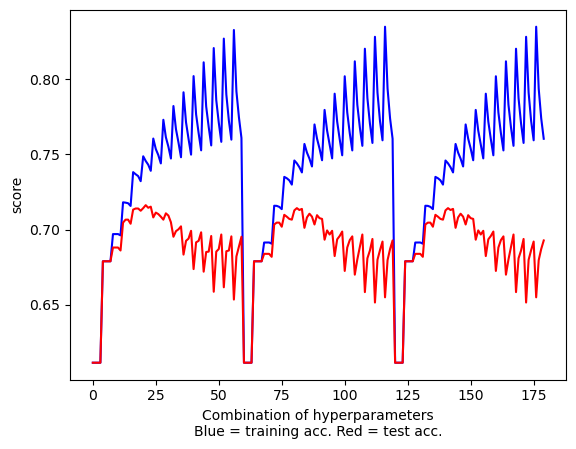

In [22]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

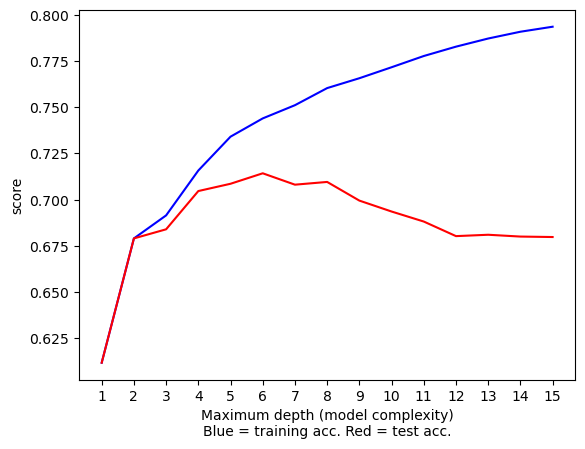

In [23]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [24]:
print("Train accuracy:", cv_1.best_estimator_.score(X_train, y_train))

Train accuracy: 0.7492596248766041


In [25]:
print("Test accuracy:", cv_1.best_estimator_.score(X_test, y_test))

Test accuracy: 0.697754749568221


In [26]:
get_tree_size(cv_1.best_estimator_)

Number of Nodes:  99
Number of Leaf Nodes:  50
Number of Rules:  49


In [27]:
feature_importances(cv_1.best_estimator_)

income_high : 0.3838319431244043
worried : 0.20433285356370615
age : 0.098921939739157
working : 0.057544469278257245
income_low : 0.05005299540373858
weight : 0.04158031738238462
contacts_count : 0.03247759889790322
smoking : 0.03029368324024604
insurance : 0.02644928384231397
height : 0.02403880581873819
alcohol : 0.014680038842922658
blood_type_unknown : 0.009082377965631772
income_gov : 0.00825304038104269
gender_female : 0.0080049219146138
gender_male : 0.005896383453381909
blood_type_ap : 0.0029514021918557024
income_med : 0.0016079449597021951
gender_other : 0.0
blood_type_abp : 0.0
blood_type_an : 0.0


In [28]:
print(cv_1.best_params_)
y_pred = cv_1.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1036
           1       0.64      0.58      0.61       701

    accuracy                           0.70      1737
   macro avg       0.69      0.68      0.68      1737
weighted avg       0.69      0.70      0.70      1737



In [29]:
sample_row = X_test[0]
print(sample_row)
prediction = cv_1.best_estimator_.predict([sample_row])
print(prediction)

[ 65 168 100   1   0   2   1   2   4   0   1   0   0   0   0   1   0   0
   0   0   0   0   1   0   0]
[0]


In [30]:
graph_decision_tree(cv_1.best_estimator_, "best_estimator")

## Model Comparison

In [31]:
from sklearn.metrics import roc_auc_score

dt_cv_best = cv_1.best_estimator_

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index (Area Under Curve) on test for DT_default:", roc_index_dt)
print("ROC index (Area Under Curve) on test for DT_optimal:", roc_index_dt_cv)

ROC index (Area Under Curve) on test for DT_default: 0.6219596660038885
ROC index (Area Under Curve) on test for DT_optimal: 0.7166416977401286


In [32]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

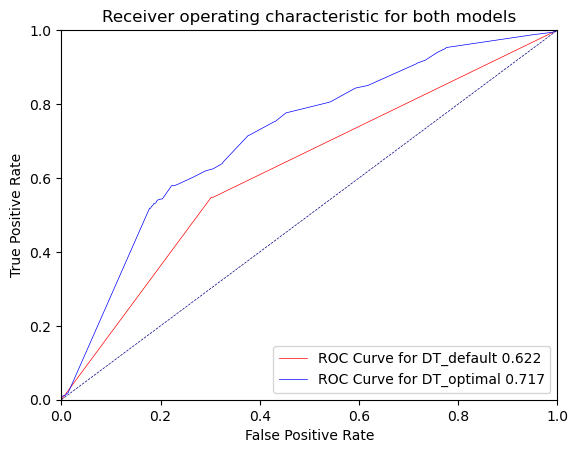

In [33]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for both models')
plt.legend(loc="lower right")
plt.show()

In [34]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump(dt_best, f)

# 2. Regression

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from itertools import permutations
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# read the veteran dataset
df = pd.read_csv('data/D2.csv', keep_default_na=False)

## Pre-processing

In [36]:
def variable_type_counts(header):
    column_data = list(df[header])
    data_types = [type(i).__name__ for i in column_data]
    type_counts = {i:data_types.count(i) for i in data_types}
    return type_counts

In [37]:
def all_variable_types():
    headers = list(df.columns.values)
    for header in headers:
        print(header,": ",variable_type_counts(header))

In [39]:
def all_value_counts(df):
    headers = list(df.columns.values)
    for header in headers:
        print(df[header].value_counts())
        print()

In [40]:
# Generic error finder
missing = [float("nan"),-1,"-1",""," ","blank","unknown"]
def find_errors(column, error_list=missing):
    errors = {}
    for value in list(column):
        if (value in error_list):
            if value not in errors: errors[value] = 0
            errors[value] += 1
    return errors

In [41]:
def find_all_missing(df=df):
    missing_values = []
    
    headers = list(df.columns.values)
    for header in headers:
        error_string = [str((find_errors(df[header])))[1:-1]]
        missing_values.append(error_string)
    missing_df = pd.DataFrame.from_records(missing_values,index=headers)
    return missing_df

missing_df = find_all_missing()
print(missing_df)

                                0
gender                           
age                              
height                           
weight                           
blood_type        'unknown': 1884
insurance                        
income                           
smoking                          
alcohol                          
contacts_count                   
working                          
worried                          
covid19_positive                 


### Ordinals to Numericals

In [42]:
df_proc = df.copy()
def ordinal_to_rankings(df_proc=df_proc):
    header = "age"
    age_ranks = {"0_10":5, "10_20":15, "20_30":25, "30_40":35, "40_50":45, "50_60":55, "60_70":65,
                "70_80":75, "80_90":85, "90_100":95, "100_110":105}
    
    df_proc[header] = df_proc[header].map(age_ranks)
    
    header = "smoking"
    smoking_ranks = {'never': 0, 'yesmedium': 4, 
                     'quit0': 5, 'quit10': 1, 'quit5': 2, 
                     'yesheavy': 7, 'yeslight': 3, 'vape': 6}
    
    df_proc[header] = df_proc[header].map(smoking_ranks)
    
    header = "working"
    working_ranks = {"never":0, "stopped":1, "home":2, "travel non critical":3, 
                     "travel critical":4}
    
    df_proc[header] = df_proc[header].map(working_ranks)
    
    header = "insurance"
    insurance_ranks = {"yes":1, "no":0}
    
    df_proc[header] = df_proc[header].map(insurance_ranks)

ordinal_to_rankings()

In [43]:
print(df_proc["age"].value_counts(),'\n')
print(df_proc["smoking"].value_counts(),'\n')
print(df_proc["insurance"].value_counts(),'\n')
print(df_proc["working"].value_counts())

age
35     1412
45     1111
25      996
55      926
65      765
75      354
15      205
5        14
105       6
Name: count, dtype: int64 

smoking
0    3749
2     485
1     473
5     319
6     247
4     230
3     206
7      80
Name: count, dtype: int64 

insurance
1    5167
0     622
Name: count, dtype: int64 

working
1    1774
0    1577
4    1312
3     620
2     506
Name: count, dtype: int64


## Nominals to Numericals

### Label Encoding

In [44]:
# Best not to use as sklearn will treat as if ordinal.
def nominal_label_encoding():
    header = "gender"
    df_proc[header+'_encoded'] = pd.factorize(df[header])[0] + 1
    
    header = "blood_type"
    df_proc[header+'_encoded'] = pd.factorize(df[header])[0] + 1
    
    header = "income"
    df_proc[header+'_encoded'] = pd.factorize(df[header])[0] + 1
    
    nominals = ["gender_encoded", "blood_type_encoded", "income_encoded"]
    for header in nominals:
        print(df_proc[header].value_counts(),'\n')

In [45]:
# nominal_label_encoding()

### One-Hot Encoding

In [46]:
# Nominal values: gender, blood_type, income
df_proc = pd.get_dummies(df_proc, dtype='int')
df_proc.head()

,age,height,weight,insurance,smoking,alcohol,contacts_count,working,worried,covid19_positive,...,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,income_gov,income_high,income_low,income_med
0,25,188,104,1,0,0,9,3,3,1,...,0,0,0,0,1,0,0,0,0,1
1,75,164,62,1,0,0,2,0,3,1,...,0,0,1,0,0,0,0,0,0,1
2,45,164,78,1,0,2,5,1,3,1,...,0,0,0,0,0,1,0,0,0,1
3,45,170,60,1,4,2,6,4,3,1,...,0,0,1,0,0,0,0,0,0,1
4,35,164,64,1,0,2,2,4,4,1,...,0,0,0,0,1,0,0,0,0,1


## Normalization

In [47]:
def min_max_normalize(df_proc=df_proc):
    column_list = list(df_proc.columns.values)

    for column in column_list:
        range = df_proc[column].max() - df_proc[column].min()
        df_proc[column] = (df_proc[column] - df_proc[column].min()) / range

In [48]:
min_max_normalize()

In [49]:

def z_score_normalize(df_proc=df_proc):
    z_score_columns = list(df_proc.columns.values)

    for column in z_score_columns:
        df_proc[column] = (df_proc[column] - df_proc[column].mean()) / df_proc[column].std()


In [50]:
df_proc.to_csv('data/D2-processed.csv', index=False)

## Identify Variables

In [51]:
y = df_proc['covid19_positive']
X = df_proc.drop(['covid19_positive'], axis=1)
X_mat = X.to_numpy()

## Training/Test Split

In [52]:
rs = 10

X_train, X_test, y_train, y_test = train_test_split(
    X_mat, y, test_size=0.3, stratify=y, random_state=rs)

## Model 1 (Default Setting)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression(random_state=rs)

model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [55]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6821322803553801
Test accuracy: 0.6758779504893494
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.74      1036
         1.0       0.61      0.55      0.58       701

    accuracy                           0.68      1737
   macro avg       0.66      0.66      0.66      1737
weighted avg       0.67      0.68      0.67      1737



### Understanding the Model

In [56]:
print(model.coef_)

[[-1.20056817 -1.70668254  1.63495086  0.26321473  0.34018405  0.30627648
   0.12780741  0.37428429  0.70382276 -0.28562415 -0.15798096  0.44470726
  -0.19790827  0.34331344 -0.1232417   0.05715149 -0.17992195  0.14566232
  -0.08421229  0.07574531 -0.0354862   0.52808981 -0.91092654 -0.19363566
   0.57757454]]


In [57]:
coef = model.coef_[0]
feature_names = X.columns

indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

height : -1.7066825418251692
weight : 1.6349508573271663
age : -1.200568173988439
income_high : -0.9109265429561124
worried : 0.7038227572364988
income_med : 0.5775745448536088
income_gov : 0.5280898124787305
gender_other : 0.4447072587492971
working : 0.37428429372832955
blood_type_abp : 0.3433134400053781
smoking : 0.3401840544127811
alcohol : 0.3062764822122812
gender_female : -0.28562414846660505
insurance : 0.26321472853276334
blood_type_abn : -0.19790827235867778
income_low : -0.19363566224581338
blood_type_bn : -0.17992195370717984
gender_male : -0.15798095815227156
blood_type_bp : 0.14566232248501165
contacts_count : 0.12780741165349688


## Model 2 (Finding Optimal Hyperparameters with GridSearchCV)

In [58]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [59]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.02210345, 0.00937538, 0.00427375, 0.00781744, 0.00583947,
       0.00983028, 0.02881629, 0.02509515, 0.02500746, 0.02301528]), 'std_fit_time': array([0.00698858, 0.00765497, 0.00514179, 0.00781744, 0.0072395 ,
       0.01004171, 0.0061509 , 0.00730512, 0.00765462, 0.00894157]), 'mean_score_time': array([0.00156271, 0.00156219, 0.        , 0.00156271, 0.00316701,
       0.00312719, 0.        , 0.        , 0.        , 0.        ]), 'std_score_time': array([0.00468814, 0.00468657, 0.        , 0.00468814, 0.0054508 ,
       0.00625439, 0.        , 0.        , 0.        , 0.        ]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Total number of models:  10


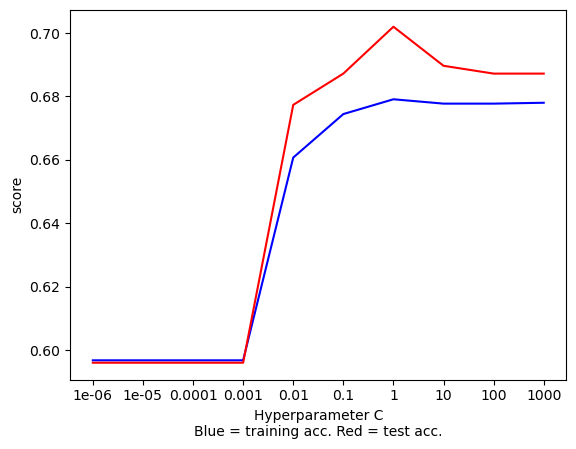

In [60]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


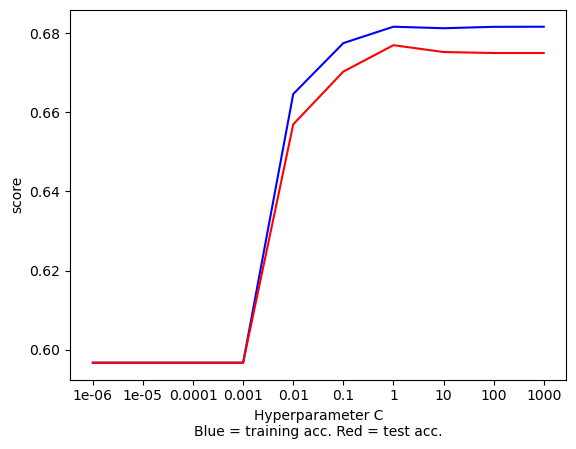

In [61]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [62]:
print(cv.best_params_)

{'C': 1}


In [63]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6821322803553801
Test accuracy: 0.6758779504893494
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.74      1036
         1.0       0.61      0.55      0.58       701

    accuracy                           0.68      1737
   macro avg       0.66      0.66      0.66      1737
weighted avg       0.67      0.68      0.67      1737



In [64]:
best_model = cv.best_estimator_
coef = best_model.coef_[0]
feature_names = X.columns

indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

indices = indices[:20]

print("Top 20 most important variables after finding optimal hyperparameters with GridSearchCV:")
for i in indices:
    print(feature_names[i], ':', coef[i])

Top 20 most important variables after finding optimal hyperparameters with GridSearchCV:
height : -1.7066825418251692
weight : 1.6349508573271663
age : -1.200568173988439
income_high : -0.9109265429561124
worried : 0.7038227572364988
income_med : 0.5775745448536088
income_gov : 0.5280898124787305
gender_other : 0.4447072587492971
working : 0.37428429372832955
blood_type_abp : 0.3433134400053781
smoking : 0.3401840544127811
alcohol : 0.3062764822122812
gender_female : -0.28562414846660505
insurance : 0.26321472853276334
blood_type_abn : -0.19790827235867778
income_low : -0.19363566224581338
blood_type_bn : -0.17992195370717984
gender_male : -0.15798095815227156
blood_type_bp : 0.14566232248501165
contacts_count : 0.12780741165349688


## Model 3 (Feature selection using Recursive Feature Elimination)

In [65]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) 


print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 25
Number of features after elimination 15


In [66]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [67]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Train accuracy: 0.6848469891411648
Test accuracy: 0.6856649395509499
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      1036
         1.0       0.63      0.55      0.59       701

    accuracy                           0.69      1737
   macro avg       0.67      0.66      0.67      1737
weighted avg       0.68      0.69      0.68      1737

{'C': 100}


In [68]:
best_model_rfe = rfe_cv.best_estimator_
coef_rfe = best_model_rfe.coef_[0]
feature_names_rfe = X.columns[rfe.support_]  

indices_rfe = np.argsort(np.absolute(coef_rfe))
indices_rfe = np.flip(indices_rfe, axis=0)

indices_rfe = indices_rfe[:14]

print("Top 14 most important variables after Recursive Feature Elimination:")
for i in indices_rfe:
    print(feature_names_rfe[i], ':', coef_rfe[i])

Top 14 most important variables after Recursive Feature Elimination:
weight : 1.7785915531558811
height : -1.6815642168089215
age : -1.251696689658755
income_high : -1.0381959454866314
gender_other : 0.8709008579202093
worried : 0.6636319916665523
income_med : 0.4310601353142977
working : 0.4179996753097404
income_gov : 0.39464913836998994
income_low : -0.3598253546277152
smoking : 0.34859127100920245
blood_type_abp : 0.3424949894291983
alcohol : 0.3045545379940412
insurance : 0.25111253575073134


## Model Comparision

In [69]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)

roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)

ROC index on test for `model`: 0.717891980017515
ROC index on test for `cv`: 0.717891980017515
ROC index on test for `rfe_cv`: 0.722513755858977


In [70]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])

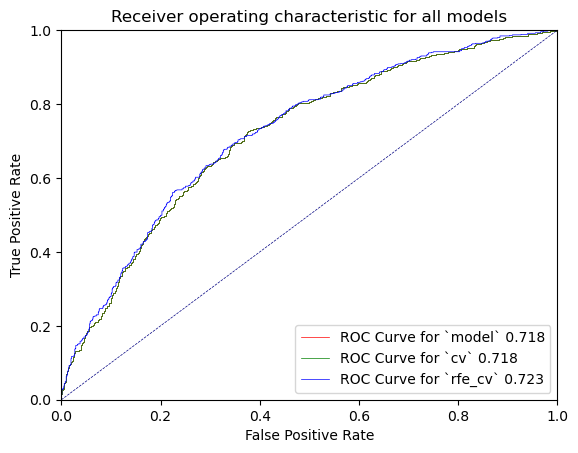

In [71]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for all models')
plt.legend(loc="lower right")
plt.show()

# 3. Neural Networks

In [72]:
file_path = "data/"
file_name = "D2-processed.csv"
df_proc = pd.read_csv(f"{file_path}{file_name}")

df_proc

,age,height,weight,insurance,smoking,alcohol,contacts_count,working,worried,covid19_positive,...,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,income_gov,income_high,income_low,income_med
0,0.2,0.609375,0.441176,1.0,0.000000,0.000000,0.428571,0.75,0.50,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.7,0.421875,0.132353,1.0,0.000000,0.000000,0.095238,0.00,0.50,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.4,0.421875,0.250000,1.0,0.000000,0.142857,0.238095,0.25,0.50,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.4,0.468750,0.117647,1.0,0.571429,0.142857,0.285714,1.00,0.50,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.3,0.421875,0.147059,1.0,0.000000,0.142857,0.095238,1.00,0.75,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,0.4,0.578125,0.367647,1.0,0.142857,0.214286,0.142857,1.00,0.75,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5785,0.2,0.453125,0.117647,1.0,0.000000,0.142857,0.952381,1.00,0.75,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5786,0.2,0.390625,0.073529,1.0,0.000000,0.142857,0.952381,1.00,0.50,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5787,0.4,0.625000,0.691176,1.0,0.000000,0.142857,0.476190,0.75,0.50,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Splitting Data

In [73]:
# target/input split
# nominals = ["gender", "blood_type", "income"]
y = df_proc['covid19_positive']
X = df_proc.drop(['covid19_positive'], axis=1)
X_mat = X.to_numpy()

In [74]:
# setting random state
rs = 10

# 30 70 split
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

## Model 1 (Default Model)

In [75]:
from sklearn.neural_network import MLPClassifier

model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

C:\Users\amygo\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=10)

In [76]:
model_1.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [77]:
print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.7677690029615005
Test accuracy: 0.687392055267703
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75      1036
         1.0       0.62      0.57      0.60       701

    accuracy                           0.69      1737
   macro avg       0.67      0.67      0.67      1737
weighted avg       0.68      0.69      0.68      1737

MLPClassifier(random_state=10)


In [78]:
print("Training Iterations:", model_1.n_iter_)

Training Iterations: 200


## Model 2 (Default Model w/ Maximum Iterations)

In [79]:
model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.7966436327739388
Test accuracy: 0.6793321819228555
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74      1036
         1.0       0.61      0.56      0.58       701

    accuracy                           0.68      1737
   macro avg       0.67      0.66      0.66      1737
weighted avg       0.68      0.68      0.68      1737

MLPClassifier(max_iter=700, random_state=10)


In [80]:
print("Training Iterations:", model_2.n_iter_)

Training Iterations: 488


## Model 3 (Finding Optimal Hyperparameters with GridSearchCV)

In [81]:
print(X_train.shape)

(4052, 25)


In [82]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 46, 5)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=700, random_state=rs),
                    return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=10),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (25,), (30,), (35,), (40,),
                                                (45,)]},
             return_train_score=True)

In [83]:
result_set = cv_1.cv_results_

Total number of models:  9


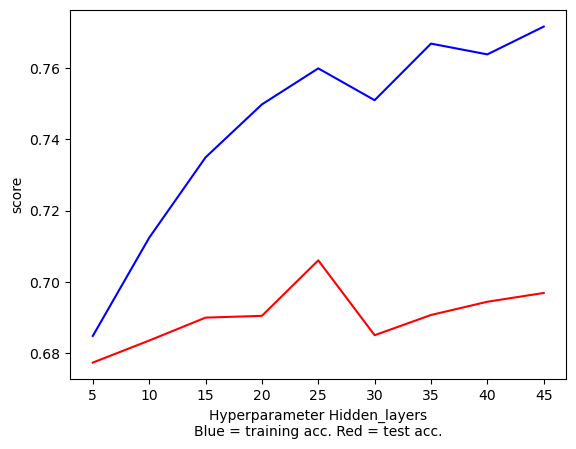

In [84]:
import matplotlib.pyplot as plt
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 46, 5))
plt.ylabel('score')
plt.show()

In [85]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.7655478775913129
Test accuracy: 0.6966033390903857
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76      1036
         1.0       0.65      0.54      0.59       701

    accuracy                           0.70      1737
   macro avg       0.68      0.67      0.67      1737
weighted avg       0.69      0.70      0.69      1737

{'hidden_layer_sizes': (25,)}


In [86]:
print("Training Iterations:", cv_1.best_estimator_.n_iter_)

Training Iterations: 510


**Highest hidden layer size was best so continue to test higher values**

In [87]:
params = {'hidden_layer_sizes': [(x,) for x in range(25, 46, 5)]}

# Max_iter is not set as it reduced test accuracy on default settings and increased runtime.
cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=700, random_state=rs),
                    return_train_score=True, cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=10),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(25,), (30,), (35,), (40,),
                                                (45,)]},
             return_train_score=True)

Total number of models:  5


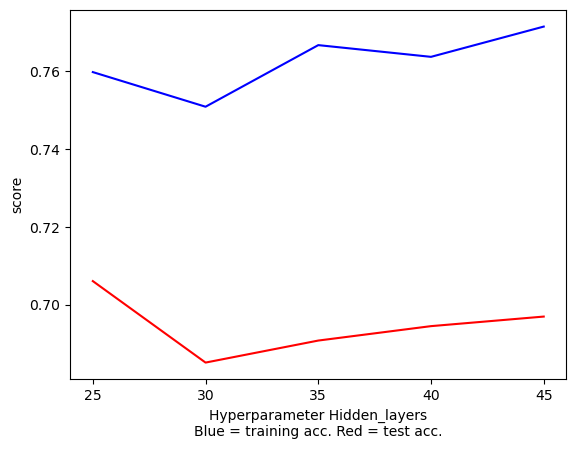

In [88]:
result_set = cv_2.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(25, 46, 5))
plt.ylabel('score')
plt.show()

In [89]:
print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.7655478775913129
Test accuracy: 0.6966033390903857
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76      1036
         1.0       0.65      0.54      0.59       701

    accuracy                           0.70      1737
   macro avg       0.68      0.67      0.67      1737
weighted avg       0.69      0.70      0.69      1737

{'hidden_layer_sizes': (25,)}


In [90]:
print("Training Iterations:", cv_2.best_estimator_.n_iter_)

Training Iterations: 510


**25 seems to best so check around 25**

In [91]:
params = {'hidden_layer_sizes': [(x,) for x in range(21, 28, 2)]}

# Max_iter is not set as it reduced test accuracy on default settings and increased runtime.
cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=700, random_state=rs),
                    return_train_score=True, cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=10),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(21,), (23,), (25,), (27,)]},
             return_train_score=True)

In [92]:
print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.7655478775913129
Test accuracy: 0.6966033390903857
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76      1036
         1.0       0.65      0.54      0.59       701

    accuracy                           0.70      1737
   macro avg       0.68      0.67      0.67      1737
weighted avg       0.69      0.70      0.69      1737

{'hidden_layer_sizes': (25,)}


In [93]:
print("Training Iterations:", cv_2.best_estimator_.n_iter_)

Training Iterations: 510


**NOTE: Looks like 25 is still best. Also added max iter and it did increase the test accuracy.**

## Model 3 Updated (GridSearchCV  w/ All Parameters)

In [94]:
params = {'hidden_layer_sizes': [(x,) for x in range(21, 28, 2)], 
          'alpha': [0.01,0.001, 0.0001],
          'activation': ['tanh', 'relu','logistic'],
          'solver': ['sgd', 'adam'],}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=700, random_state=rs), 
                    cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=10),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.01, 0.001, 0.0001],
                         'hidden_layer_sizes': [(21,), (23,), (25,), (27,)],
                         'solver': ['sgd', 'adam']})

In [95]:
print("Train accuracy:", cv_3.best_estimator_.score(X_train, y_train))
print("Test accuracy:", cv_3.best_estimator_.score(X_test, y_test))

y_pred = cv_3.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.7615992102665351
Test accuracy: 0.6948762233736328
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75      1036
         1.0       0.62      0.61      0.62       701

    accuracy                           0.69      1737
   macro avg       0.68      0.68      0.68      1737
weighted avg       0.69      0.69      0.69      1737

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (25,), 'solver': 'adam'}


In [96]:
print("Training Iterations:", cv_3.best_estimator_.n_iter_)

Training Iterations: 569


In [97]:
cv_3_more_layers = MLPClassifier(max_iter=700, hidden_layer_sizes = (11,7,5,3,), alpha = 0.001,
                        random_state=rs)
cv_3_more_layers.fit(X_train, y_train)

print("Train accuracy:", cv_3_more_layers.score(X_train, y_train))
print("Test accuracy:", cv_3_more_layers.score(X_test, y_test))

y_pred = cv_3_more_layers.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3_more_layers)

Train accuracy: 0.7381539980256664
Test accuracy: 0.696027633851468
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76      1036
         1.0       0.65      0.54      0.59       701

    accuracy                           0.70      1737
   macro avg       0.68      0.67      0.67      1737
weighted avg       0.69      0.70      0.69      1737

MLPClassifier(alpha=0.001, hidden_layer_sizes=(11, 7, 5, 3), max_iter=700,
              random_state=10)


In [98]:
print("Training Iterations:", cv_3_more_layers.n_iter_)

Training Iterations: 333


## Model 4 (Decision Tree with Feature Selection)

In [99]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}


In [100]:
def analyse_feature_importance(dm_model, feature_names):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    for i in indices:
        print(feature_names[i], ':', importances[i])

analyse_feature_importance(dt_best.best_estimator_, X.columns)

income_high : 0.3838319431244043
worried : 0.20433285356370615
age : 0.098921939739157
working : 0.057544469278257245
income_low : 0.05005299540373858
weight : 0.04158031738238462
contacts_count : 0.03247759889790322
smoking : 0.03029368324024604
insurance : 0.02644928384231397
height : 0.02403880581873819
alcohol : 0.014680038842922658
blood_type_unknown : 0.009082377965631772
income_gov : 0.00825304038104269
gender_female : 0.0080049219146138
gender_male : 0.005896383453381909
blood_type_ap : 0.0029514021918557024
income_med : 0.0016079449597021951
gender_other : 0.0
blood_type_abp : 0.0
blood_type_an : 0.0
blood_type_bn : 0.0
blood_type_bp : 0.0
blood_type_on : 0.0
blood_type_op : 0.0
blood_type_abn : 0.0


In [101]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(4052, 6)


In [102]:
print(X.columns[selectmodel.get_support()])

Index(['age', 'weight', 'working', 'worried', 'income_high', 'income_low'], dtype='object')


## Model 4 Updated (GridSearchCV with Feature Selection)

In [103]:
# Given the dramatic dimentionality reduction the range of hidden_layer_sizes has been brought back to the first range.
params = {'hidden_layer_sizes': [(x,) for x in range(5, 26, 5)], 
          'alpha': [0.01,0.001, 0.0001],
          'activation': ['tanh', 'relu','logistic'],
          'solver': ['sgd', 'adam'],}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=700, random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=10),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.01, 0.001, 0.0001],
                         'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (25,)],
                         'solver': ['sgd', 'adam']})

In [104]:
print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))
print("Training Iterations:", cv_sel_model.best_estimator_.n_iter_)
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.7156959526159921
Test accuracy: 0.7075417386298215
Training Iterations: 351
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76      1036
         1.0       0.65      0.60      0.62       701

    accuracy                           0.71      1737
   macro avg       0.70      0.69      0.69      1737
weighted avg       0.70      0.71      0.71      1737

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (15,), 'solver': 'adam'}


**NOTE: The alpha and hidden_layer_sizes need further exploring. As every best estimator has included the default activation function and solver, these will be excluded from the grid search.**

In [105]:
params = {'hidden_layer_sizes': [(x,) for x in range(11, 20, 2)], 
          'alpha': [0.1, 0.05, 0.01, 0.005]}

cv_sel_model_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=700, random_state=rs), cv=10, n_jobs=-1)
cv_sel_model_2.fit(X_train_sel_model, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=10),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.05, 0.01, 0.005],
                         'hidden_layer_sizes': [(11,), (13,), (15,), (17,),
                                                (19,)]})

In [106]:
print("Train accuracy:", cv_sel_model_2.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model_2.score(X_test_sel_model, y_test))
print("Training Iterations:", cv_sel_model_2.best_estimator_.n_iter_)

y_pred = cv_sel_model_2.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model_2.best_params_)

Train accuracy: 0.7156959526159921
Test accuracy: 0.7075417386298215
Training Iterations: 351
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76      1036
         1.0       0.65      0.60      0.62       701

    accuracy                           0.71      1737
   macro avg       0.70      0.69      0.69      1737
weighted avg       0.70      0.71      0.71      1737

{'alpha': 0.01, 'hidden_layer_sizes': (15,)}


In [107]:
print("Training Iterations:", cv_sel_model_2.best_estimator_.n_iter_)

Training Iterations: 351


In [108]:
cv_sel_model_more_layers = MLPClassifier(max_iter=700, hidden_layer_sizes = (9,6), 
                                         alpha = 0.01, random_state=rs)
cv_sel_model_more_layers.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model_more_layers.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model_more_layers.score(X_test_sel_model, y_test))

y_pred = cv_sel_model_more_layers.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model_more_layers)

Train accuracy: 0.7139684106614018
Test accuracy: 0.7132987910189983
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77      1036
         1.0       0.66      0.61      0.63       701

    accuracy                           0.71      1737
   macro avg       0.70      0.70      0.70      1737
weighted avg       0.71      0.71      0.71      1737

MLPClassifier(alpha=0.01, hidden_layer_sizes=(9, 6), max_iter=700,
              random_state=10)


In [109]:
print("Training Iterations:", cv_sel_model_more_layers.n_iter_)

Training Iterations: 252


In [110]:
attribute_names = list(X.columns[selectmodel.get_support()])
coefs = cv_sel_model_more_layers.coefs_[0]
abs_coefs = np.absolute(coefs)
for atribute, weight_sum in zip(attribute_names, abs_coefs.sum(axis=1)):
    print(str(atribute) + ": " + str(weight_sum))

age: 3.103495079584495
weight: 3.308945961992076
working: 3.343530362967632
worried: 4.2922268048405146
income_high: 3.6387131518193887
income_low: 2.5878327970501185


**NOTE: No change. Therefore best params are: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (15,), 'solver': 'adam'}.**

## Model Comparision

In [111]:
from sklearn.metrics import roc_auc_score

default_model = model_1
default_max_iter = model_2
dt_cv_best = cv_3_more_layers
dt_cv_sel_best = cv_sel_model_more_layers
#
y_pred_proba_dt = default_model.predict_proba(X_test)
y_pred_proba_max_iter = default_max_iter.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)
y_pred_proba_dt_cv_sel = dt_cv_sel_best.predict_proba(X_test_sel_model)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_max_iter = roc_auc_score(y_test, y_pred_proba_max_iter[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])
roc_index_dt_cv_sel = roc_auc_score(y_test, y_pred_proba_dt_cv_sel[:, 1])

print("ROC index (Area Under Curve) on test for DT_default:", roc_index_dt)
print("ROC index (Area Under Curve) on test for DT_default_max_iter:", roc_index_dt_max_iter)
print("ROC index (Area Under Curve) on test for DT_GSCV:", roc_index_dt_cv)
print("ROC index (Area Under Curve) on test for DT_GSCV_feature_selection:", roc_index_dt_cv_sel)

ROC index (Area Under Curve) on test for DT_default: 0.7334860844133313
ROC index (Area Under Curve) on test for DT_default_max_iter: 0.7268560082397457
ROC index (Area Under Curve) on test for DT_GSCV: 0.7301166562935465
ROC index (Area Under Curve) on test for DT_GSCV_feature_selection: 0.749906366525482


In [112]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_max_iter, tpr_max_iter, thresholds_max_iter = roc_curve(y_test, y_pred_proba_max_iter[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])
fpr_dt_cv_sel, tpr_dt_cv_sel, thresholds_dt_cv_sel = roc_curve(y_test, y_pred_proba_dt_cv_sel[:,1])

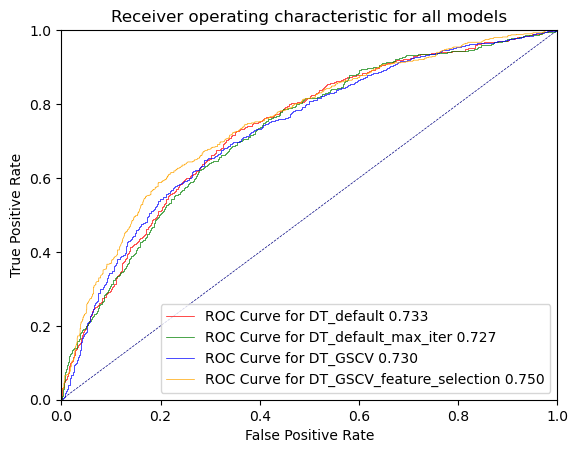

In [113]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(
    roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_max_iter, tpr_max_iter, label='ROC Curve for DT_default_max_iter {:.3f}'.format(
    roc_index_dt_max_iter), color='green', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_GSCV {:.3f}'.format(
    roc_index_dt_cv), color='blue', lw=0.5)
plt.plot(fpr_dt_cv_sel, tpr_dt_cv_sel, label='ROC Curve for DT_GSCV_feature_selection {:.3f}'.format(
    roc_index_dt_cv_sel), color='orange', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for all models')
plt.legend(loc="lower right")
plt.show()

# Decision-Making

## Classification Reports

In [114]:
print("Train accuracy:", dt_cv_best.score(X_train_DT, y_train))
print("Test accuracy:", dt_cv_best.score(X_test_DT, y_test))
y_pred = dt_cv_best.predict(X_test_DT)
print(classification_report(y_test, y_pred))

Train accuracy: 0.5979763079960513
Test accuracy: 0.5981577432354634
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75      1036
         1.0       0.80      0.01      0.01       701

    accuracy                           0.60      1737
   macro avg       0.70      0.50      0.38      1737
weighted avg       0.68      0.60      0.45      1737



In [115]:
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6848469891411648
Test accuracy: 0.6856649395509499
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      1036
         1.0       0.63      0.55      0.59       701

    accuracy                           0.69      1737
   macro avg       0.67      0.66      0.67      1737
weighted avg       0.68      0.69      0.68      1737



In [116]:
print("Train accuracy:", cv_sel_model_more_layers.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model_more_layers.score(X_test_sel_model, y_test))

y_pred = cv_sel_model_more_layers.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

Train accuracy: 0.7139684106614018
Test accuracy: 0.7132987910189983
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77      1036
         1.0       0.66      0.61      0.63       701

    accuracy                           0.71      1737
   macro avg       0.70      0.70      0.70      1737
weighted avg       0.71      0.71      0.71      1737



##  Updated ROC Curve

ROC index (Area Under Curve) on test for Best_Decision_Tree: 0.7166416977401286
ROC index on test for Best_Regression: 0.722513755858977
ROC index (Area Under Curve) on test for Best_Neural_Network: 0.749906366525482


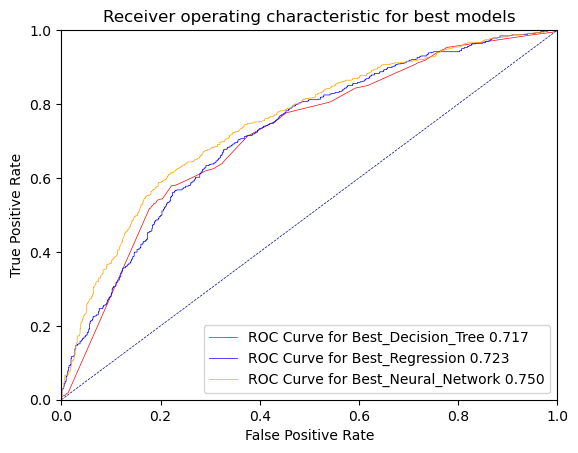

In [117]:
dt_cv_best = dt_best.best_estimator_
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test_DT)
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])
print("ROC index (Area Under Curve) on test for Best_Decision_Tree:", roc_index_dt_cv)
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for Best_Decision_Tree {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)

y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
print("ROC index on test for Best_Regression:", roc_index_rfe_cv)
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for Best_Regression {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

dt_cv_sel_best = cv_sel_model_more_layers
y_pred_proba_dt_cv_sel = dt_cv_sel_best.predict_proba(X_test_sel_model)
roc_index_dt_cv_sel = roc_auc_score(y_test, y_pred_proba_dt_cv_sel[:, 1])
print("ROC index (Area Under Curve) on test for Best_Neural_Network:", roc_index_dt_cv_sel)
fpr_dt_cv_sel, tpr_dt_cv_sel, thresholds_dt_cv_sel = roc_curve(y_test, y_pred_proba_dt_cv_sel[:,1])
plt.plot(fpr_dt_cv_sel, tpr_dt_cv_sel, label='ROC Curve for Best_Neural_Network {:.3f}'.format(
    roc_index_dt_cv_sel), color='orange', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for best models')
plt.legend(loc="lower right")
plt.show()